# matplotlib: quick (and partial) summary - part 2
Marco Chierici & Giuseppe Jurman

May 11, 2022

(partially abridged from [Top 50 matplotlib Visualizations – The Master Plots](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

# Top Python Visualizations - The Master List

Similarly to what we have done for *ggplot2*, we list now a set of worked examples with the most common charts used in data visualization with Matplotlib and Seaborn.

## Setup

Start defining a general setup for the plots

In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# don't display warning messages
warnings.filterwarnings(action='ignore')
# set graphical parameters
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

# show plots inline and make them interactive
# %matplotlib notebook
%matplotlib inline

# versions
print(mpl.__version__)  # 3.5.1
print(sns.__version__)  # 0.11.2

3.7.0
0.12.2


The following code examples usually follow the workflow

1. Import (data);
1. Prepare (select/create variables);
1. Visualize (basic plot);
1. Decorate (fine-tuning).

## Correlation

The plots under correlation is used to visualize the relationship between 2 or more variables. That is, how does one variable change with respect to another.

### Scatterplot
Scatterplot is a classic and fundamental plot used to study the relationship between two variables. If you have multiple groups in your data you may want to visualise each group in a different color. In matplotlib, you can conveniently do this using `plt.scatter()`.

In [11]:
# Import data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


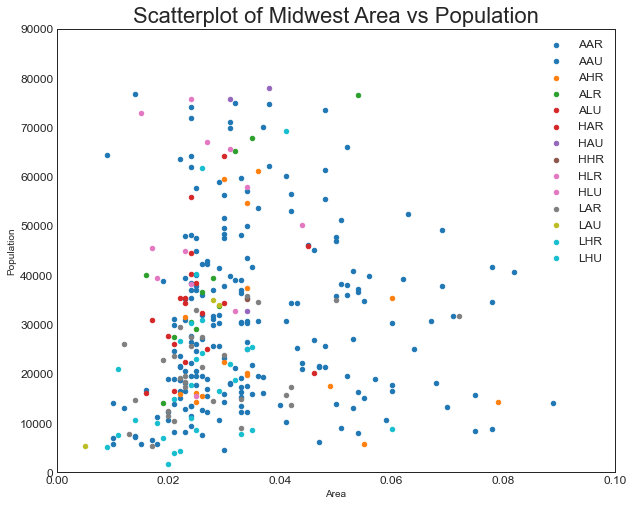

In [12]:
# Data preparation
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(10, 8), dpi=72, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=np.array(colors[i]).reshape((1,4)), label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

### Bubble plot with Encircling

Sometimes you want to show a group of points within a boundary to emphasize their importance. In this example, you get the records from the dataframe that should be encircled and pass it to the *encircle()* described in the code below.

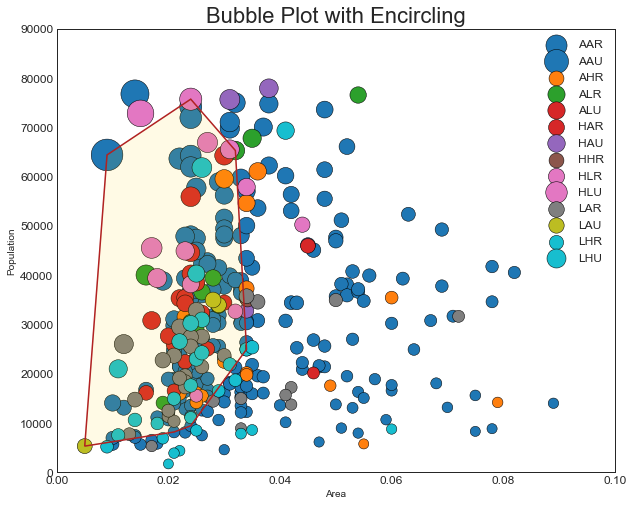

In [13]:
from matplotlib import patches
from scipy.spatial import ConvexHull

# Step 1: Draw Scatterplot with unique color for each category of midwest dataset
fig = plt.figure(figsize=(10, 8), dpi=72, facecolor='w', edgecolor='k') # facecolor: background; edgecolor: border
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], 
                s='dot_size', c=np.array(colors[i]).reshape((1,4)), 
                label=str(category), edgecolors='black', linewidths=.5)

# Step 2: Encircling
# src: https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x, y, ax=None, **kw):
    if not ax:
        ax=plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

For more information:
* [numpy.c_](https://numpy.org/doc/stable/reference/generated/numpy.c_.html)
* [scipy.spatial.ConvexHull](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html)

### Scatter plot with linear regression line of best fit

We'll use `seaborn` now. If you want to understand how two variables change with respect to each other, the line of best fit is the way to go. The below plot shows how the line of best fit differs amongst various groups in the data. To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the `hue='cyl'` parameter from the `sns.lmplot()` call below.

In [14]:
# Import Data: mpg
df_mpg = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


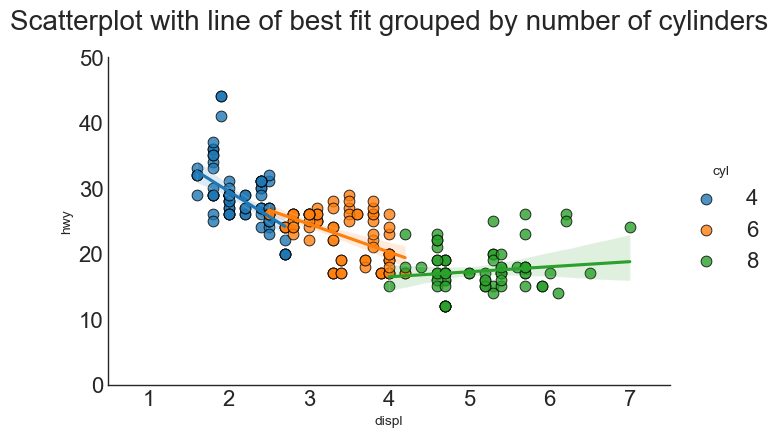

In [15]:
# create a working copy of the original data (more on this later)
df = df_mpg.copy()
# select only car models with 4, 6, 8 cylinders
df_select = df.loc[df.cyl.isin([4, 6, 8]), :]

# Plot
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", 
                    data=df_select, 
                    height=4, 
                    aspect=1.6, 
                    robust=True, 
                    palette='tab10', 
                    scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", 
          fontsize=20, 
          pad=20) # pad controls the title offset from the top of the axes
plt.show()

### Each regression line in its own panel

Alternately, you can show the best fit line for each group in its own panel, similar to ggplot2's `facet_wrap()`. You can do this by setting the `col=groupingcolumn` parameter inside the `sns.lmplot()`.

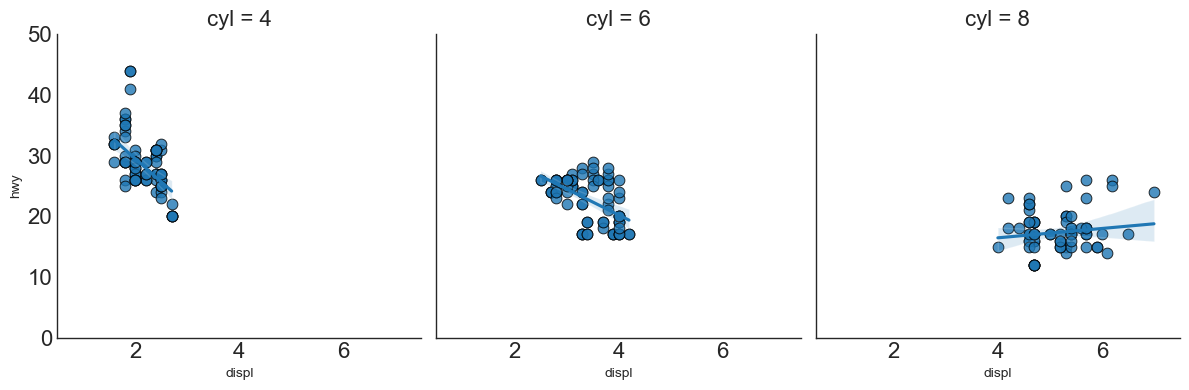

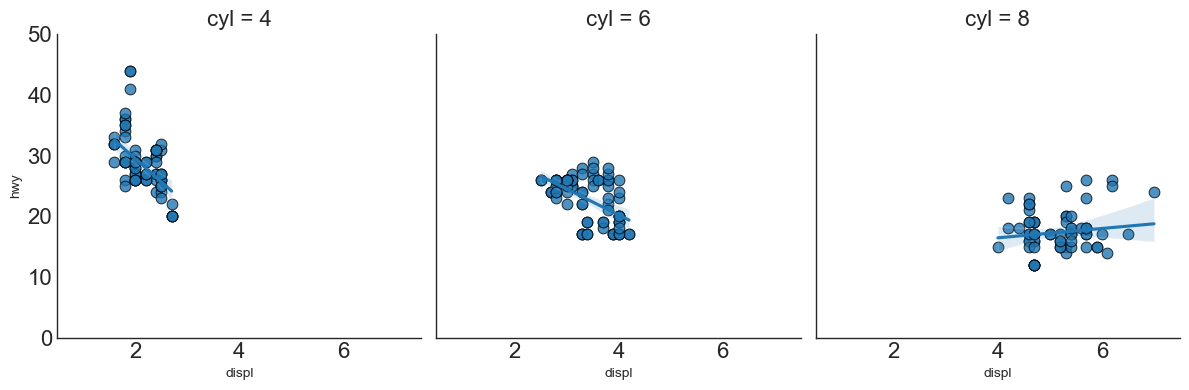

In [16]:
# filter
df_select = df_mpg.loc[df_mpg.cyl.isin([4, 6, 8]), :]

# each scatterplot with regression line in its own panel
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     height=4, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

### Jittering with stripplot

Often multiple datapoints have exactly the same X and Y values. As a result, multiple points get plotted over each other and hide. To avoid this, jitter the points slightly so you can visually see them. This is convenient to do using seaborn’s `stripplot()`.

In [17]:
# Import Data
df = df_mpg.copy()

Wait, why not simply `df = df_mpg`?

Because the latter assignment creates a **copy by reference** (or "shallow copy"): this means that any changes to the data in `df_mpg` will be reflected in the copy `df`, **and vice versa**.

If we use `df = df_mpg.copy()`, we create a **deep copy** of `df_mpg` to `df`: the data (and indices) of `df_mpg` are actually copied and not referenced. This means that changes to the original data will **not** be reflected to the copy.

You can try it yourself:

In [18]:
s = pd.Series([1, 2], index=["a", "b"])
print("Original data")
print(s)

shallow = s
deep = s.copy()

s[0] = 3
shallow[1] = 4

print("Original data (after modification)")
print(s)
print("Shallow copy (after modification)")
print(shallow)
print("Deep copy (after modification)")
print(deep)

Original data
a    1
b    2
dtype: int64
Original data (after modification)
a    3
b    4
dtype: int64
Shallow copy (after modification)
a    3
b    4
dtype: int64
Deep copy (after modification)
a    1
b    2
dtype: int64


Let's go back to creating our plot:

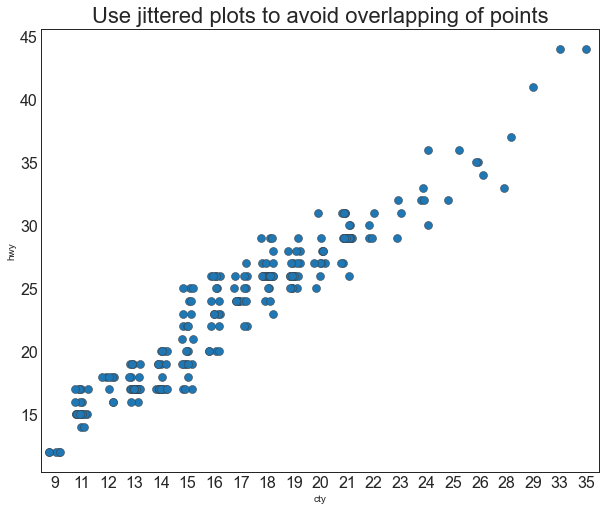

In [19]:
# Draw Stripplot of hwy vs cty
fig, ax = plt.subplots(figsize=(10, 8), dpi=72)
sns.stripplot(x="cty", y="hwy", data=df, jitter=0.25, size=8, ax=ax, linewidth=.5)
# alternate syntax:
# sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

Additionally, we could also adjust the transparency with `alpha`:

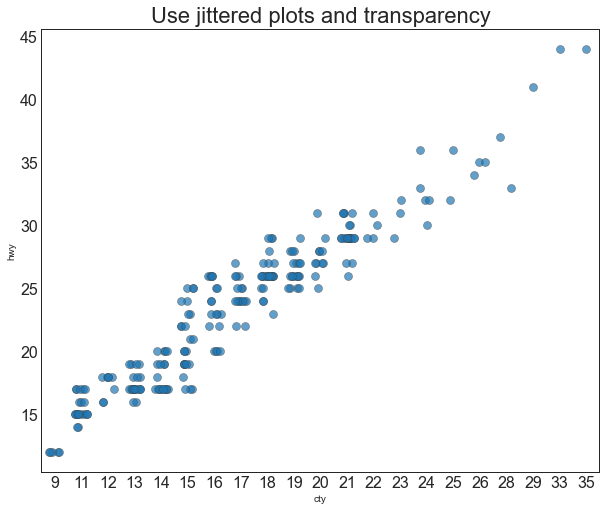

In [20]:
# Import Data
df = df_mpg.copy()

# Draw Stripplot of hwy vs cty
fig, ax = plt.subplots(figsize=(10, 8), dpi=72)    
sns.stripplot(x="cty", y="hwy", data=df, jitter=0.25, size=8, ax=ax, linewidth=.5, alpha=.7)

# Decorations
plt.title('Use jittered plots and transparency', fontsize=22)
plt.show()

## Counts Plot

Another option to avoid the problem of overlapping points is to increase the size of the dot depending on how many points lie in that spot. So, the larger the size of the point the more is the concentration of points around that.

In [21]:
# Import Data
df = df_mpg.copy()
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')
df_counts.head()

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2


TypeError: stripplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

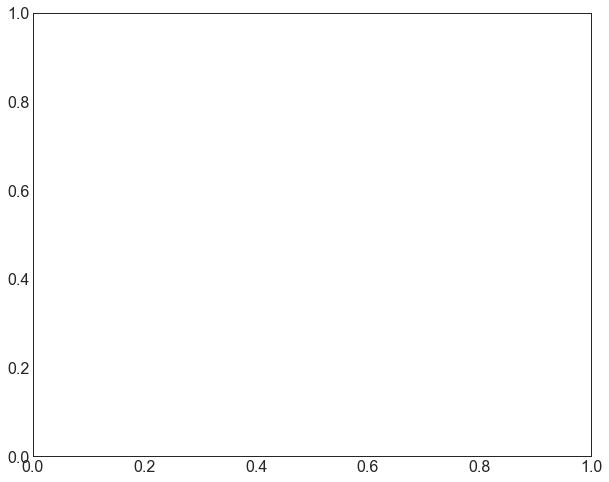

In [23]:
# Draw Stripplot: mind the "sizes" argument, not "size" any more
fig, ax = plt.subplots(figsize=(10, 8), dpi=72)    
sns.stripplot(df_counts.cty, df_counts.hwy, sizes=df_counts.counts.values*5, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

### Marginal Histogram

Marginal histograms have a histogram along the X and Y axis variables. This is used to visualize the relationship between the X and Y along with the univariate distribution of the X and the Y individually. This plot if often used in exploratory data analysis (EDA).

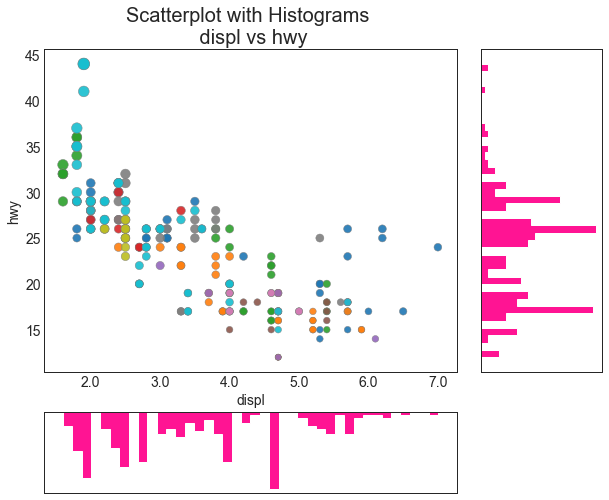

In [24]:
# Import Data
df = df_mpg.copy()

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 8), dpi=72)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2) # {h,w}space = amount of {height,width} reserved between subplots

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1]) # extend until the last row & col (excluded)
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[]) # all but last row (:-1), last column (-1)
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels=[], yticklabels=[]) # last row (-1), all but last column (:-1)

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', 
                data=df,
                s=df.cty*4,
                c=df.manufacturer.astype('category').cat.codes, # numerical category IDs
                alpha=.9,
                cmap='tab10',
                edgecolors='gray',
                linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

### Marginal Boxplot

Marginal boxplot serves a similar purpose as marginal histogram. However, the boxplot helps to pinpoint the median, 25th and 75th percentiles of the X and the Y.

In [ ]:
# Import Data
df = df_mpg.copy()

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 8), dpi=72)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

### Correlogram

Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

In [ ]:
# Import data
df_cars = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = df_cars.copy()

# Prepare (compute correlation matrix)
df_corr = df.corr()

# Plot
plt.figure(figsize=(12, 10), dpi=72)
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, 
            cmap='RdYlGn', center=0, annot=True)

# Decorate
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Pairwise Plot

The pairwise plot is a must have tool for bivariate analysis to understand the relationship between all possible pairs of numeric variables.

In [ ]:
# Load Dataset
df = sns.load_dataset('iris')

# pairwise plot
plt.figure(figsize=(10, 8), dpi=72)
sns.pairplot(df, kind="scatter", hue="species")
plt.show()

In [ ]:
# pairwise plot with regression lines (kind="reg")
plt.figure(figsize=(10, 8), dpi=72)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

The kind of visualization for the main diagonal is chosen automatically by `pairplot`, but you can manually specify with the `diag_kind` argument choosing between a histogram (`'hist'`) or a density plot (`'kde'`), which is the default. Let's visualize histograms:

In [ ]:
# pairwise plot with regression lines (kind="reg") and histograms on the main diag (diag_kind="hist")
plt.figure(figsize=(10, 8), dpi=72)
sns.pairplot(df, kind="reg", diag_kind="hist", hue="species")
plt.show()

## Deviation

### Diverging Bars

If you want to see how the items are varying based on a single metric and visualize the order and amount of this variance, the diverging bars is a great tool. It helps to quickly differentiate the performance of groups in your data and is quite intuitive and instantly conveys the point.

In [ ]:
# import data
df = df_cars.copy()

# prepare
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# plot
plt.figure(figsize=(8, 5), dpi=72)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# decorate
plt.gca().set(ylabel='Model', xlabel='Mileage')
plt.yticks(df.index, df.cars, fontsize=8)
plt.title('Diverging Bars of Car Mileage', fontdict={'size': 20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### Diverging Texts

Diverging texts is similar to diverging bars and it preferred if you want to show the value of each items within the chart in a nice and presentable way

In [ ]:
# import & prepare (same as before)
df = df_cars.copy()
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# plot
plt.figure(figsize=(8, 8), dpi=100)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size': 8})

# decorate
plt.yticks(df.index, df.cars, fontsize=8)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size': 20})
plt.xlabel('Mileage')
plt.ylabel('Model')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### Diverging Dot Plot

Diverging dot plot is also similar to the diverging bars. However, compared to diverging bars, the absence of bars reduces the amount of contrast and disparity between the groups.

In [ ]:
# data preparation
df = df_cars.copy()
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(12, 14), dpi=100)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color': 'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars, fontsize=10)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size': 20})
plt.xlabel('Mileage')
plt.ylabel('Model')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### Diverging Lollipop Chart with Markers

Lollipop with markers provides a flexible way of visualizing the divergence by laying emphasis on any significant datapoints you want to bring attention to and give reasoning within the chart appropriately.

In the following example, we still plot the car mileage, also adding annotations to highlight:
* the top 4 cars with best MPG, with a green rectangle;
* the bottom 2 cars with worst MPG, with a red rectangle;
* one Fiat model, with a dark orange lollipop and a larger size;
* the 3 Mercedes-Benz models, with a textual annotation and an `arrowprop`.

In [ ]:
# Prepare Data
df = df_cars.copy()
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(12, 14), dpi=100)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars, fontsize=10)
plt.xticks(fontsize=10)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### Area Chart

By coloring the area between the axis and the lines, the area chart throws more emphasis not just on the peaks and troughs but also the duration of the highs and lows. The longer the duration of the highs, the larger is the area under the line.

In [ ]:
import numpy as np
import pandas as pd

# import & prepare data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0) / df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(8, 5), dpi=100)
# fill_between color the values greater than 0 and the values lower than 0
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')

# Decorations
xtickvals = [str(m)[:3].upper() + "-" + str(y) for y, m in zip(df.date.dt.year, df.date.dt.month_name())]
# dt is required because the data was parsed into date format
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35, 35)
plt.xlim(1, 100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.xticks(fontsize=8)
plt.show()

## Ranking

### Ordered Bar Chart

Ordered bar charts convey the rank order of the items effectively. If we also add the value of the metric above the chart, the user gets the precise information from the chart itself.

In [ ]:
# mpg data
df_raw = df_mpg.copy()
# compute mean 'cty' by manufacturer
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
df

In [ ]:
# Draw plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=72, facecolor='white')
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Add values above bars, as text annotation
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')

# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size': 22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=8)

# Add patches to color the X axis labels
import matplotlib.patches as patches
# xy coords, width, and height are relative to the Figure due to transform=fig.transFigure 
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', 
                       transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', 
                       transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### Lollipop Chart
Lollipop charts servesa similar purpose as ordered bar charts, in a visually pleasing way.

In [ ]:
# mpg data
df_raw = df_mpg.copy()
# compute mean 'cty' by manufacturer (as before)
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
df

In [ ]:
# Draw plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=72)
# same as for the bar chart, with a smaller linewidth
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
# let's add the lollipop "heads" 
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size': 22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size': 12})
ax.set_ylim(0, 30)

# Add values above lollipop marks, as text annotation
for row in df.itertuples(): # iterate over df rows as named tuples
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

### Dot Plot
The dot plot conveys the rank order of the items. And since it is aligned along the horizontal axis, you can visualize how far the points are from each other more easily.

In [ ]:
# Prepare Data
df_raw = df_mpg.copy()
df = df_raw[['hwy', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('hwy', inplace=True)
df.reset_index(inplace=True)
df

In [ ]:
# define reasonable limits for x axis
x_min = df.hwy.min().round() - 2
x_max = df.hwy.max().round() + 2

# Draw plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=72)
ax.hlines(y=df.index, xmin=x_min, xmax=x_max, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.hwy, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(x_min, x_max)
plt.show()

### Slope Chart
Slope chart is most suitable for comparing the ‘Before’ and ‘After’ positions of a given person/item.

In [ ]:
import matplotlib.lines as mlines

# Import Data
df_gdp = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")
df = df_gdp.copy()
df.head()

In [ ]:
# prepare plot labels
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

print(left_label[:3])

In [ ]:
# custom function to draw a line connecting two points p1 and p2
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color='red' if p1[1] - p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=72)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1, p1], [3, p2])
    ax.text(1 - 0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size': 14})
    ax.text(3 + 0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size': 14})

# 'Before' and 'After' Annotations
ax.text(1 - 0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size': 18, 'weight': 700})
ax.text(3 + 0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size': 18, 'weight': 700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size': 22})
ax.set(xlim=(0, 4), ylim=(0, 14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1, 3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

### Dumbbell Plot
Dumbbell plot conveys the ‘before’ and ‘after’ positions of various items along with the rank ordering of the items. Its very useful if you want to visualize the effect of a particular project / initiative on different objects.

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)
df

In [ ]:
# Function to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=color)
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='#f7f7f7', dpi=72)

# Vertical Lines (this can be rewritten as a for loop)
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7) # darker blue
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7) # lighter blue

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i], 'skyblue')

# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size': 22})
ax.set(xlim=(0, .25), ylim=(-1, 27), ylabel='Index')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])    
plt.show()

## Distribution

## Histogram for Continuous Variable
Histograms show the frequency distribution of a given variable. The below representation groups the frequency bars based on a categorical variable giving a greater insight about the continuous variable and the categorical variable at the same time.

In [ ]:
# Import Data
df = df_mpg.copy()

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# check what is returned by DataFrame.groupby()
# for i, df in df_agg:
#     print(i)
#     print(df.shape)
#     print(df.head())


In [ ]:
# Draw
plt.figure(figsize=(10, 7), dpi=72)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title('Stacked Histogram of %s colored by %s' % (x_var,groupby_var), fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

### Histogram for Categorical Variable
The histogram of a categorical variable shows the frequency distribution of that variable. By coloring the bars, you can visualize the distribution in connection with another categorical variable representing the colors.

In [ ]:
# Import Data
df = df_mpg.copy()

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(10, 7), dpi=72)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of {x_var} colored by {groupby_var}", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
plt.xticks(ticks=bins[:-1], labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

### Density Plot
Density plots are commonly used to visualise the distribution of a continuous variable. By grouping them by the ‘response’ variable, you can inspect the relationship between X and Y. The below case, anticipated during the previous lab, describes how the distribution of city mileage varies with respect the number of cylinders.

In [ ]:
# Import Data
df = df_mpg.copy()

# Draw Plot (version 1)
plt.figure(figsize=(10, 8), dpi=72)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

In [ ]:
# Draw Plot (version 2)
plt.figure(figsize=(10, 8), dpi=72)
sns.kdeplot(data=df, x="cty", hue="cyl", shade=True, alpha=.7, 
            common_norm=False, # don't rescale each density
            palette=["g", "deeppink", "dodgerblue", "orange"])

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.show()


### Density Plot + Histogram
Adding a histogram to density plots brings together the information conveyed by the two types of plots, so you can have them both in a single figure.

In [ ]:
# Import Data
df = df_mpg.copy()

# Draw Plot
plt.figure(figsize=(13, 10), dpi=72)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", 
             hist_kws={'alpha':.7}, kde_kws={'linewidth': 3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth': 3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth': 3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

### Joy plot (Ridgeline plot)
Joy plots allow the density curves of different groups to overlap: they are a great way to visualize the distribution of a large number of groups in relation to each other. It looks pleasing to the eye and conveys just the right information clearly. It can be easily built using the `joypy` package which is based on matplotlib and pandas.

For the R/ggplot2 version, have a look at [ggridges](https://github.com/clauswilke/ggridges).

Trivia: the term "Joy plot" dates back to a 2017 [Twitter post.](https://twitter.com/hnrklndbrg/status/883675698300420098)

In [ ]:
import joypy

# Draw Plot
fig, axes = joypy.joyplot(df_mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14, 10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

### Distributed Dot Plot
Distributed dot plots show the univariate distribution of points segmented by groups. The darker the points, the more is the concentration of data points in that region. By coloring the median differently, the real positioning of the groups becomes apparent instantly.

In [ ]:
# Prepare Data
df_raw = df_mpg.copy()
cyl_colors = {4: 'tab:red', 5: 'tab:green', 6: 'tab:blue', 8: 'tab:orange'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

# Mean and Median city mileage by make
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(10, 8), dpi=72)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make, :]
    ax.scatter(y=np.repeat(i, df_make.shape[0]), x=df_make.cty, s=75, edgecolors='gray', c='w', alpha=0.5)
    ax.scatter(y=i, x=df_median.loc[df_median.index==make, "cty"], s=75, c='firebrick')

# Decorate
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

### Box Plot
Box plots are a great way to visualize the distribution, showing the median, 25th / 75th quartiles, and the outliers. However, you need to be careful about interpreting the size the boxes which can potentially distort the number of points contained within that group. So, manually providing the number of observations in each box can help overcome this drawback.

For example, the first two boxes on the left have boxes of the same size even though they have 5 and 47 obs respectively. So writing the number of observations in that group (inside the boxplot or elsewhere meaningful) becomes necessary.

In [ ]:
# Import
df = df_mpg.copy()

# Draw
plt.figure(figsize=(13, 10), dpi=72)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

# Add number of observations inside the boxplot (optional)
def add_n_obs(df, group_col, y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size': 14}, color='white')

add_n_obs(df, group_col='class', y='hwy')    

# Decorate
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

### Dot + Box Plot
Dot + Box plot Conveys similar information as a boxplot split in groups. The dots, in addition, gives a sense of how many data points lie within each group.

In [ ]:
# Import
df = df_mpg.copy()

# Draw
plt.figure(figsize=(13, 10), dpi=72)
sns.boxplot(x="class", y="hwy", data=df)
sns.stripplot(x="class", y="hwy", data=df, color="black", size=3, jitter=1)

# Decorate
plt.title("Box Plot of Highway Mileage by Vehicle Class", fontsize=22)
plt.show()


A dot + box plot grouped by a categorical variable is a little trickier: here's an example you can use as a template.

In [ ]:
# Import
df = df_mpg.copy()

# Draw
plt.figure(figsize=(13, 10), dpi=72)
mpg_boxplot = sns.boxplot(x="class", y="hwy", hue="cyl", data=df, palette="pastel")
mpg_stripplot = sns.stripplot(
    x="class",
    y="hwy",
    hue="cyl",
    data=df,
    color="black",
    dodge=True, # this correctly aligns the dots with the individual box plots
    jitter=True,
    alpha=0.7,
)

# add some vertical lines to ease separation of groups
for i in range(len(df["class"].unique()) - 1):
    plt.vlines(i + 0.5, 10, 45, linestyles="solid", colors="gray", alpha=0.2)

# Decorate
plt.title("Box Plot of Highway Mileage by Vehicle Class", fontsize=22)
# since we have two Seaborn plots with "hue", we'll have two legends with the same information
# let's remove one of the redundant legends:
handles, labels = mpg_stripplot.get_legend_handles_labels()
n_classes = df["cyl"].nunique()
plt.legend(handles[0:n_classes], labels[0:n_classes], title="cyl")
plt.show()


### Violin Plot
Violin plot is an alternative to box plots. The shape or area of the violin depends on the number of observations it holds. However, the violin plots can be harder to read and it is not commonly used in professional settings.

In [ ]:
# Import
df = df_mpg.copy()

# Draw
plt.figure(figsize=(13, 10), dpi=72)
sns.violinplot(x="class", y="hwy", data=df, scale="width", inner="quartile")

# Decorate
plt.title("Violin Plot of Highway Mileage by Vehicle Class", fontsize=22)
plt.show()


[`sns.violinplot` documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

### Population Pyramid
Population pyramid can be used to show either the distribution of the groups ordered by the volumne, or the stage-by-stage filtering of a population. We see below an example of the latter, to show how many people pass through each stage of a marketing funnel, grouped by gender.

In [ ]:
# Read data
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv"
)
df.head(15)


In [ ]:
# Draw Plot
plt.figure(figsize=(8, 6), dpi=100)
group_col = "Gender"
order_of_bars = df.Stage.unique()[::-1]
colors = [
    plt.cm.Spectral(i / float(len(df[group_col].unique()) - 1))
    for i in range(len(df[group_col].unique()))
]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(
        x="Users",
        y="Stage",
        data=df.loc[df[group_col] == group, :],
        order=order_of_bars,
        color=c,
        label=group,
    )

# Decorate
plt.xlabel("Users")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=10)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()


### Categorical Plots
Seaborn provides the function `catplot()` that can be used to produce different kinds of categorical plots, such as box plots and violin plots. But there's more: for example, we can use it to generate categorical estimate plots such as bar or count plots.

We see below an example that visualizes the counts distribution of RMS Titanic survivors in relation to the passengers deck.

In [ ]:
# Load Titanic Dataset
titanic = sns.load_dataset("titanic")
titanic.head()


In [ ]:
# Plot
sns.catplot(
    x="alive",
    col="deck",
    col_wrap=4,
    data=titanic[titanic.deck.notnull()],
    kind="count",
    height=2.5,
    aspect=0.8,
    palette="tab20",
)

plt.show()

Another example on the Titanic dataset: this time we use `catplot` to show violin plots of passenger ages, grouped by the town where they embarked.

We also pass additional keyword arguments to the plot function (in this case, `violinplot`):

In [ ]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
sns.catplot(
    x="age",
    y="embark_town",
    hue="sex",
    col="class",
    data=titanic[titanic.embark_town.notnull()],
    col_wrap=1,
    orient="h",
    height=2.5,
    aspect=3,
    palette="tab10",
    kind="violin",
    dodge=True,
    cut=0, # limit the violin range within the range of the observed data
    bw=0.2, # scale factor to use when computing the kernel bandwidth
)


## Composition

### Waffle Chart
Waffle charts show the compositions of groups in a larger population. In `ggplot2` we manually created a Waffle chart to show ggplot2's capabilities (although there is a dedicated library, [`waffle`](https://github.com/hrbrmstr/waffle)). Here we directly use the `pywaffle` package.

In [ ]:
from pywaffle import Waffle

# Import
df_raw = df_mpg.copy()

# Prepare
df = df_raw.groupby("class").size().reset_index(name="counts")
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i / float(n_categories)) for i in range(n_categories)]

df

In [ ]:
# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    values=df["counts"],
    labels=[
        "{0} ({1})".format(n[0], n[1]) for n in df[["class", "counts"]].itertuples()
    ],
    legend={"loc": "upper left", "bbox_to_anchor": (1.05, 1), "fontsize": 12},
    title={"label": "# Vehicles by Class", "loc": "center", "fontsize": 18},
    colors=colors,
    figsize=(16, 9),
)


`pywaffle` allows you to add multiple waffle charts as subplots to the same figure. In this case, you need to merge the parameters for each plot as dict values and pass them to the argument `plots`. The keys of this dict are *integers* describing the position of the subplot, in the format `312`, standing for nrow, ncol, index.

In [ ]:
# Prepare distinct data frames to hold data for the different waffles
# By Class
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

# By Cylinders
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

# By Make
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': df_class['counts_class'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_class[['class', 'counts_class']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
            'colors': colors_class
        },
        312: {
            'values': df_cyl['counts_cyl'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_cyl[['cyl', 'counts_cyl']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        313: {
            'values': df_make['counts_make'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_make[['manufacturer', 'counts_make']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(10, 10)
)

### Pie Chart
Pie charts are a classic way to show the composition of groups. However, it is not generally advisable to use them because the area of the pie portions can sometimes become misleading. So, if you have to use a pie chart, it is highly recommended to explicitly write the percentage (or numbers) for each portion of the pie.

In [ ]:
# Import
df_raw = df_mpg.copy()

# Prepare
df = df_raw.groupby('class').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

In [ ]:
# Import
df_raw = df_mpg.copy()

# Prepare
df = df_raw.groupby("class").size().reset_index(name="counts")

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi=72)

data = df["counts"]
categories = df["class"]
# fraction of the radius with which to offset wedges
# (here we offset only the 6th wedge)
explode = [0, 0, 0, 0, 0, 0.1, 0]


def func(pct, allvals):
    """
    Compute absolute numbers from percentages
    """
    absolute = int(pct / 100.0 * np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(
    data,
    autopct=lambda pct: func(pct, data),
    textprops=dict(color="w"),
    colors=plt.cm.Dark2.colors,
    startangle=140,
    explode=explode,
)

# Decorate
ax.legend(
    wedges,
    categories,
    title="Vehicle Class",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)
plt.setp(autotexts, size=12, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()


### Treemap
Treemaps are similar to pie charts: they do a better job without misleading the contributions by each group. In the below example, we use the Python module `squarify`.

In [ ]:
import squarify

# Import
df_raw = df_mpg.copy()

# Prepare
df = df_raw.groupby("class").size().reset_index(name="counts")
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df["counts"].values.tolist()
colors = [plt.cm.Spectral(i / float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12, 8), dpi=72)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

# Decorate
plt.title("Treemap of Vehicle Class")
plt.axis("off")
plt.show()


The following example shows a little more customization (larger text, padding):

In [ ]:
# Draw Plot
plt.figure(figsize=(12, 8), dpi=72)
mpl.rcParams['font.size'] = 12
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, pad=True)

# Decorate
plt.title("Treemap of Vehicle Class")
plt.axis("off")
plt.show()

mpl.rcParams.update(mpl.rcParamsDefault)

### Bar Chart
The bar chart is a classic way of visualizing items based on counts or any given metric. 

In below chart, we use a different (random) color for each item, but you might typically want to pick one color for all items unless you to color them by groups. The color names get stored inside `all_colors` in the code below. You can change the color of the bars by setting the `color` argument in `plt.plot()`.

In [ ]:
import random

# Import
df_raw = df_mpg.copy()

# Prepare
df = df_raw.groupby("manufacturer").size().reset_index(name="counts")
n = df["manufacturer"].unique().__len__() + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = [random.choice(all_colors) for k in range(n)]

# Plot Bars
plt.figure(figsize=(10, 8), dpi=80)
plt.bar(df["manufacturer"], df["counts"], color=c, width=0.5) # single color: e.g., color="firebrick"
for i, val in enumerate(df["counts"].values):
    plt.text(
        i,
        val,
        float(val),
        horizontalalignment="center",
        verticalalignment="bottom",
        fontdict={"fontweight": 500, "size": 12},
    )

# Decoration
plt.gca().set_xticklabels(df["manufacturer"], rotation=60, horizontalalignment="right")
plt.title("Number of Vehicles by Manufacturers", fontsize=22)
plt.ylabel("# Vehicles")
plt.ylim(0, 45)
plt.show()
